In [ ]:
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3015145 entries, 0 to 3015144
Data columns (total 18 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   id                        object 
 1   fecha_dato                object 
 2   fecha_inscripcion         object 
 3   anio_lectivo              int64  
 4   cod_departamento_escuela  int64  
 5   numero_escuela            int64  
 6   cod_grado_escolar         object 
 7   cod_nivel_educ            object 
 8   cod_evaluacion_final      float64
 9   cod_motivo_repeticion     float64
 10  cod_concepto_final_rend   float64
 11  cod_concepto_final_cond   float64
 12  cantidad_inasist_justif   float64
 13  cod_departamento          float64
 14  nro_escuela               float64
 15  desc_escuela              object 
 16  cod_area_escuela          object 
 17  desc_area_escuela         object 
dtypes: float64(7), int64(3), object(8)
memory usage: 414.1+ MB
None
                                 id  f

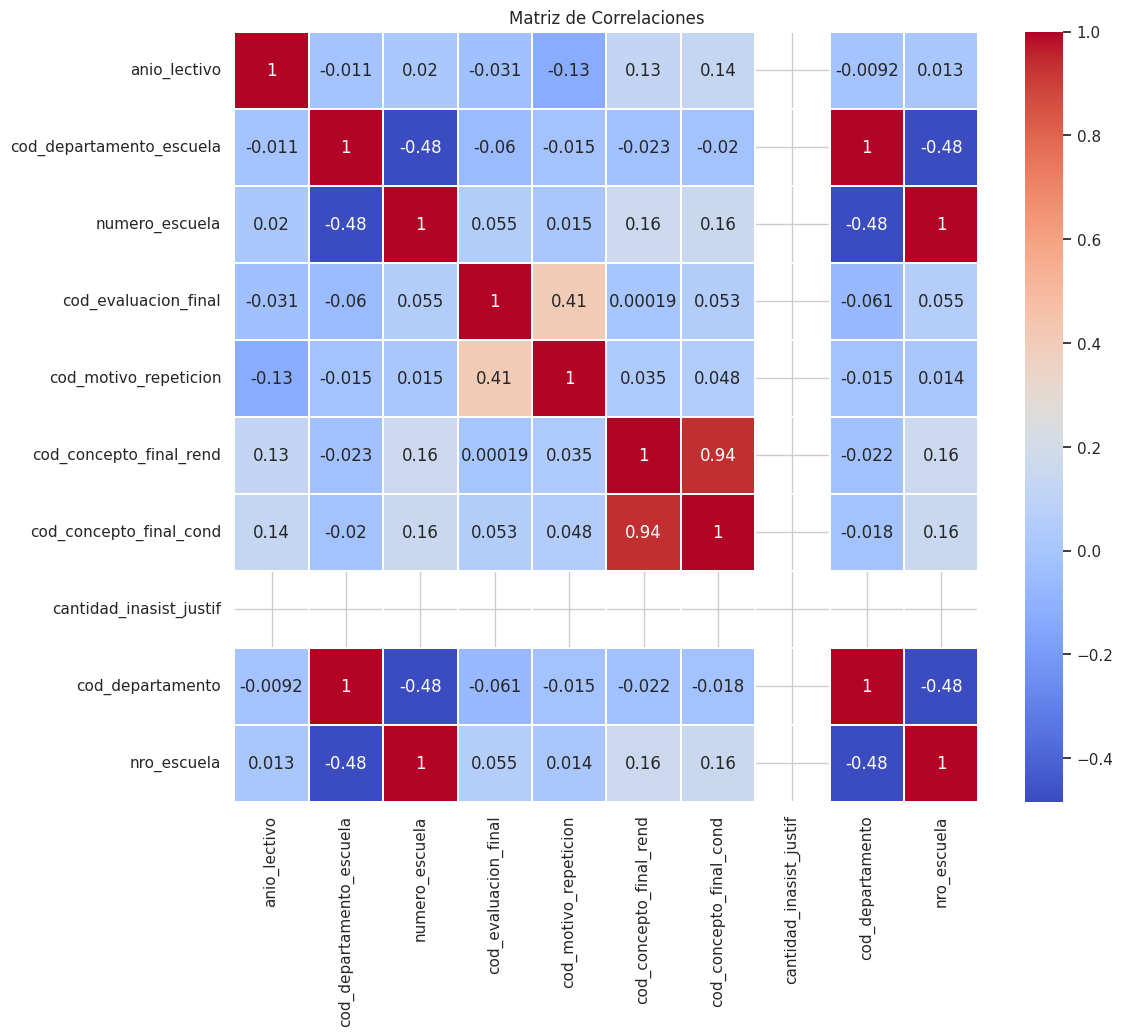

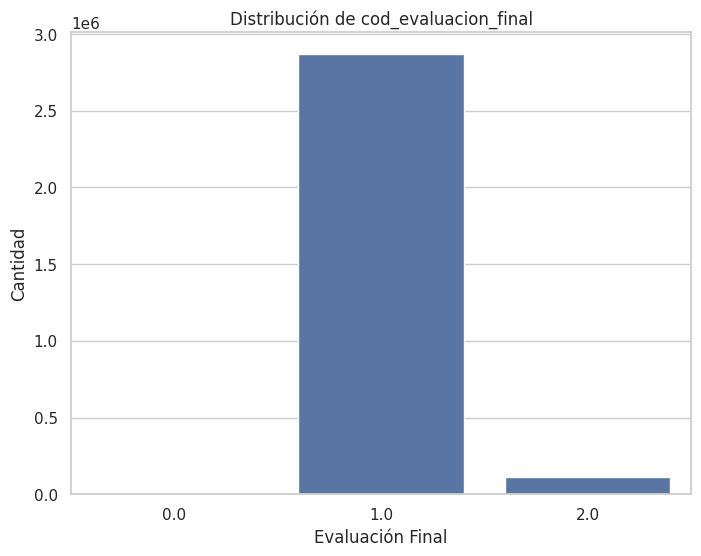

ValueError: List of boxplot statistics and `positions` values must have same the length

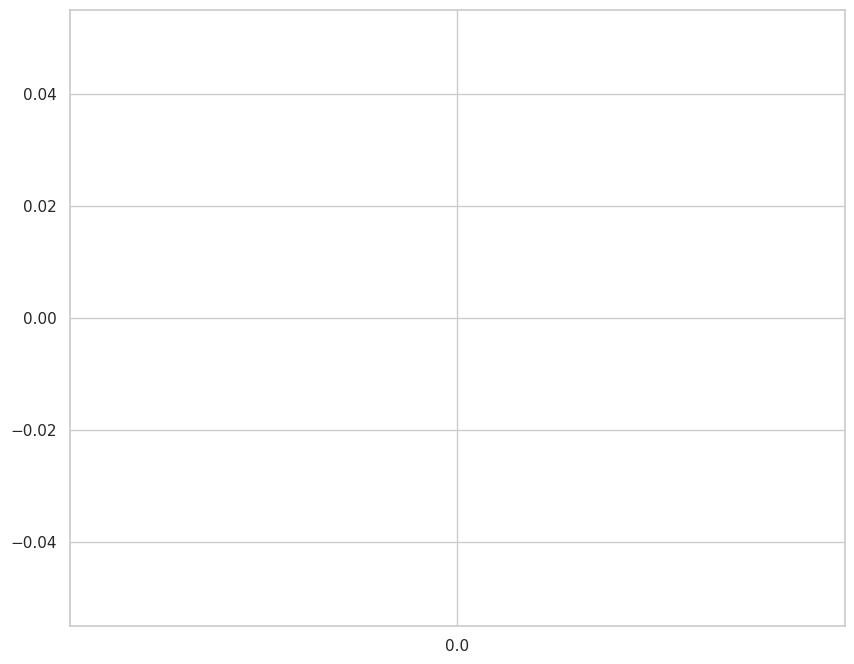

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Cargar el dataset
df = pd.read_csv('/content/drive/My Drive/Python/df_ceip.csv')

# Información general del DataFrame
print(df.info())

# Primeras filas del DataFrame
print(df.head())

# Descripción estadística del DataFrame
print(df.describe(include='all'))

# Seleccionar solo las columnas numéricas para calcular la matriz de correlaciones
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Visualización de correlaciones entre variables numéricas
plt.figure(figsize=(12, 10))
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.2)
plt.title('Matriz de Correlaciones')
plt.show()

# Distribución de la variable objetivo 'cod_evaluacion_final'
plt.figure(figsize=(8, 6))
sns.countplot(x='cod_evaluacion_final', data=df)
plt.title('Distribución de cod_evaluacion_final')
plt.xlabel('Evaluación Final')
plt.ylabel('Cantidad')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer
import joblib

# Cargar el dataset
df = pd.read_csv('/content/drive/My Drive/Python/df_ceip.csv', sep=',', encoding='latin-1')

# Columnas a descartar inicialmente basado en el análisis
columns_to_drop = ['id', 'fecha_dato', 'fecha_inscripcion', 'desc_escuela',
                   'cod_area_escuela', 'desc_area_escuela', 'cantidad_inasist_justif']

df_cleaned = df.drop(columns=columns_to_drop)

# Imputación de valores faltantes usando SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df_imputed = pd.DataFrame(imputer.fit_transform(df_cleaned), columns=df_cleaned.columns)

# Eliminar filas donde cod_evaluacion_final es 0
df_imputed = df_imputed[df_imputed['cod_evaluacion_final'] != 0]

# Codificar variables categóricas
label_encoder = LabelEncoder()
df_imputed['cod_grado_escolar'] = label_encoder.fit_transform(df_imputed['cod_grado_escolar'])
df_imputed['cod_nivel_educ'] = label_encoder.fit_transform(df_imputed['cod_nivel_educ'])
df_imputed['cod_evaluacion_final'] = label_encoder.fit_transform(df_imputed['cod_evaluacion_final'])

# Separar la variable objetivo del resto de características
X = df_imputed.drop(columns=['cod_evaluacion_final'])
y = df_imputed['cod_evaluacion_final']

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un objeto de regresión logística con un límite de iteraciones alto
logistic_regression = LogisticRegression(max_iter=5000, random_state=42)

# Entrenar el modelo
logistic_regression.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = logistic_regression.predict(X_test)

# Evaluar el rendimiento del modelo
print("Accuracy en conjunto de prueba:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Guardar el modelo entrenado en Google Drive
modelo_path = '/content/drive/My Drive/Python/modelo_logistic_regression.pkl'
joblib.dump(logistic_regression, modelo_path)

Mounted at /content/drive
Accuracy en conjunto de prueba: 0.9941476244728468

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    580107
           1       0.91      0.94      0.92     22896

    accuracy                           0.99    603003
   macro avg       0.95      0.97      0.96    603003
weighted avg       0.99      0.99      0.99    603003



['/content/drive/My Drive/Python/modelo_logistic_regression.pkl']

In [ ]:
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Cargar el modelo guardado desde Google Drive
modelo_path = '/content/drive/My Drive/Python/modelo_logistic_regression.pkl'
logistic_regression = joblib.load(modelo_path)

# Cargar el archivo de validación
verify_data_path = '/content/drive/My Drive/Python/st_verify_data.csv'
verify_data = pd.read_csv(verify_data_path, sep=',', encoding='latin-1')

# Preprocesamiento de los datos de validación
# Columnas a descartar inicialmente basado en el análisis
columns_to_drop = ['id', 'fecha_dato', 'fecha_inscripcion', 'desc_escuela',
                   'cod_area_escuela', 'desc_area_escuela', 'cantidad_inasist_justif']

verify_data_cleaned = verify_data.drop(columns=columns_to_drop)

# Imputación de valores faltantes usando SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
verify_data_imputed = pd.DataFrame(imputer.fit_transform(verify_data_cleaned), columns=verify_data_cleaned.columns)

# Codificación de variables categóricas
label_encoder_grado = LabelEncoder()
label_encoder_nivel = LabelEncoder()

verify_data_imputed['cod_grado_escolar'] = label_encoder_grado.fit_transform(verify_data_imputed['cod_grado_escolar'])
verify_data_imputed['cod_nivel_educ'] = label_encoder_nivel.fit_transform(verify_data_imputed['cod_nivel_educ'])

# Realizar predicciones en los datos de validación
predicciones = logistic_regression.predict(verify_data_imputed)

# Ajustar las predicciones para que sean 1 y 2 en lugar de 0 y 1
predicciones = predicciones + 1

# Crear el DataFrame de entrega
entrega = pd.DataFrame({
    'id': verify_data['id'],
    'evaluacion_final': predicciones
})

# Guardar el DataFrame en un archivo CSV en Google Drive
entrega_path = '/content/drive/My Drive/Python/archivo_entrega.csv'
entrega.to_csv(entrega_path, index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Cargar el archivo de validación
verify_data_path = '/content/drive/My Drive/Python/st_verify_data.csv'
verify_data = pd.read_csv(verify_data_path, sep=',', encoding='latin-1')

# Cargar el archivo de entrega
entrega_path = '/content/drive/My Drive/Python/archivo_entrega.csv'
entrega = pd.read_csv(entrega_path)

# Verificar la cantidad de filas en ambos DataFrames
if len(entrega) == len(verify_data):
    print(f"Archivo de entrega guardado en {entrega_path} y tiene la misma cantidad de filas que verify_data: {len(entrega)}")
else:
    print(f"Error: la cantidad de filas en el archivo de entrega ({len(entrega)}) no coincide con verify_data ({len(verify_data)})")

Archivo de entrega guardado en /content/drive/My Drive/Python/archivo_entrega.csv y tiene la misma cantidad de filas que verify_data: 753787
